In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
print(train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


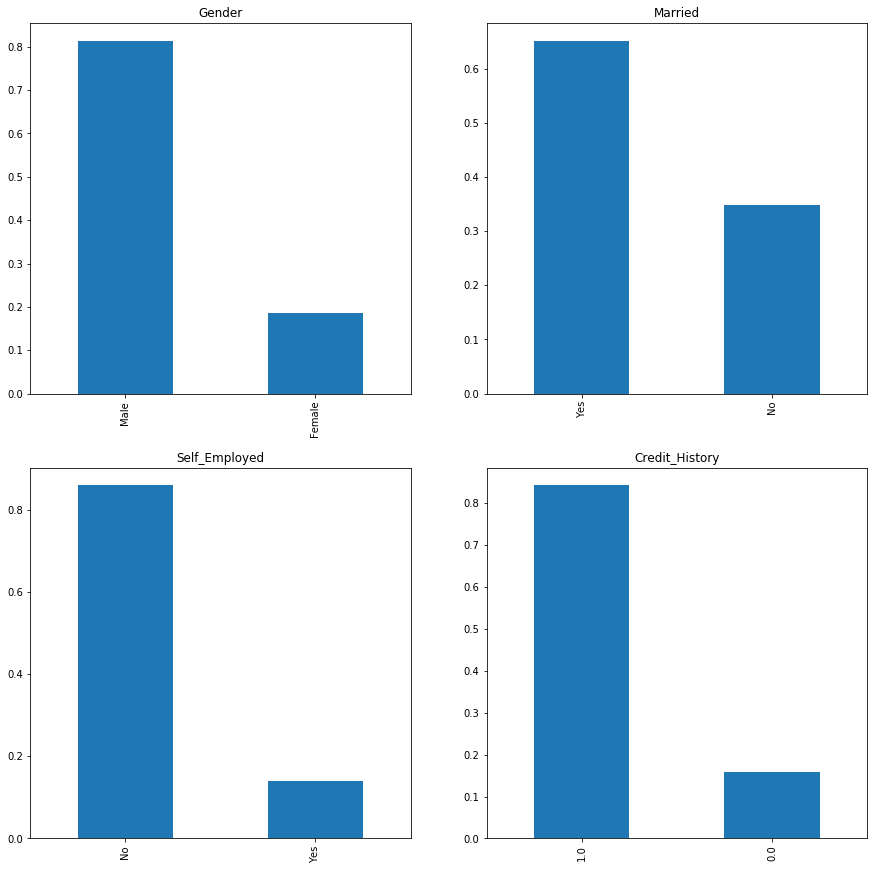

In [3]:
#categorical variables-1
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (15,15),title = 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(figsize = (15,15),title = 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize = (15,15),title = 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize = (15,15),title = 'Credit_History')
plt.show()

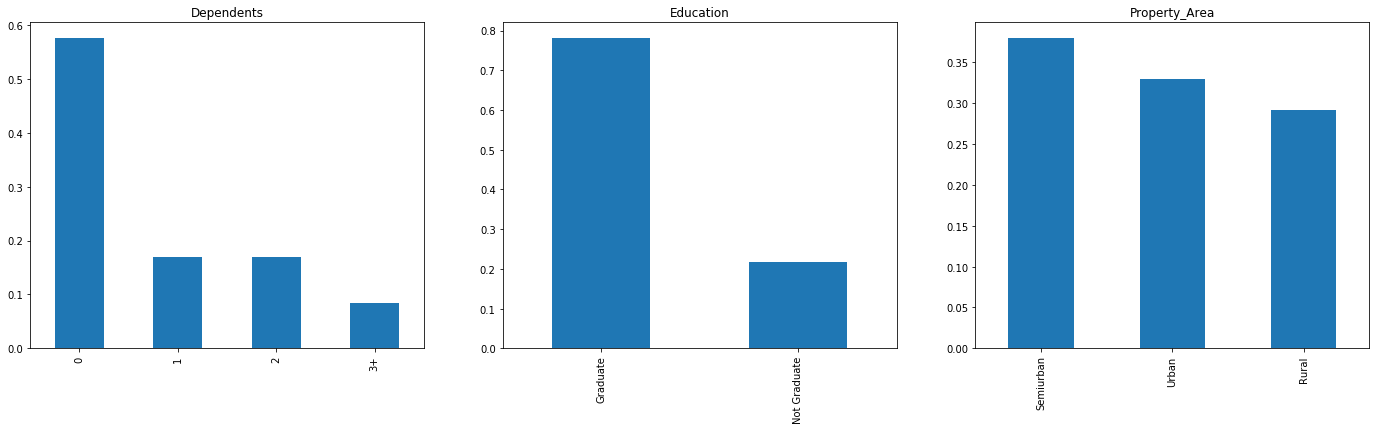

In [4]:
#categorical variables- ordinal variables
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title = 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize= True).plot.bar(figsize=(24,6),title = 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize= True).plot.bar(figsize=(24,6),title = 'Property_Area')
plt.show()

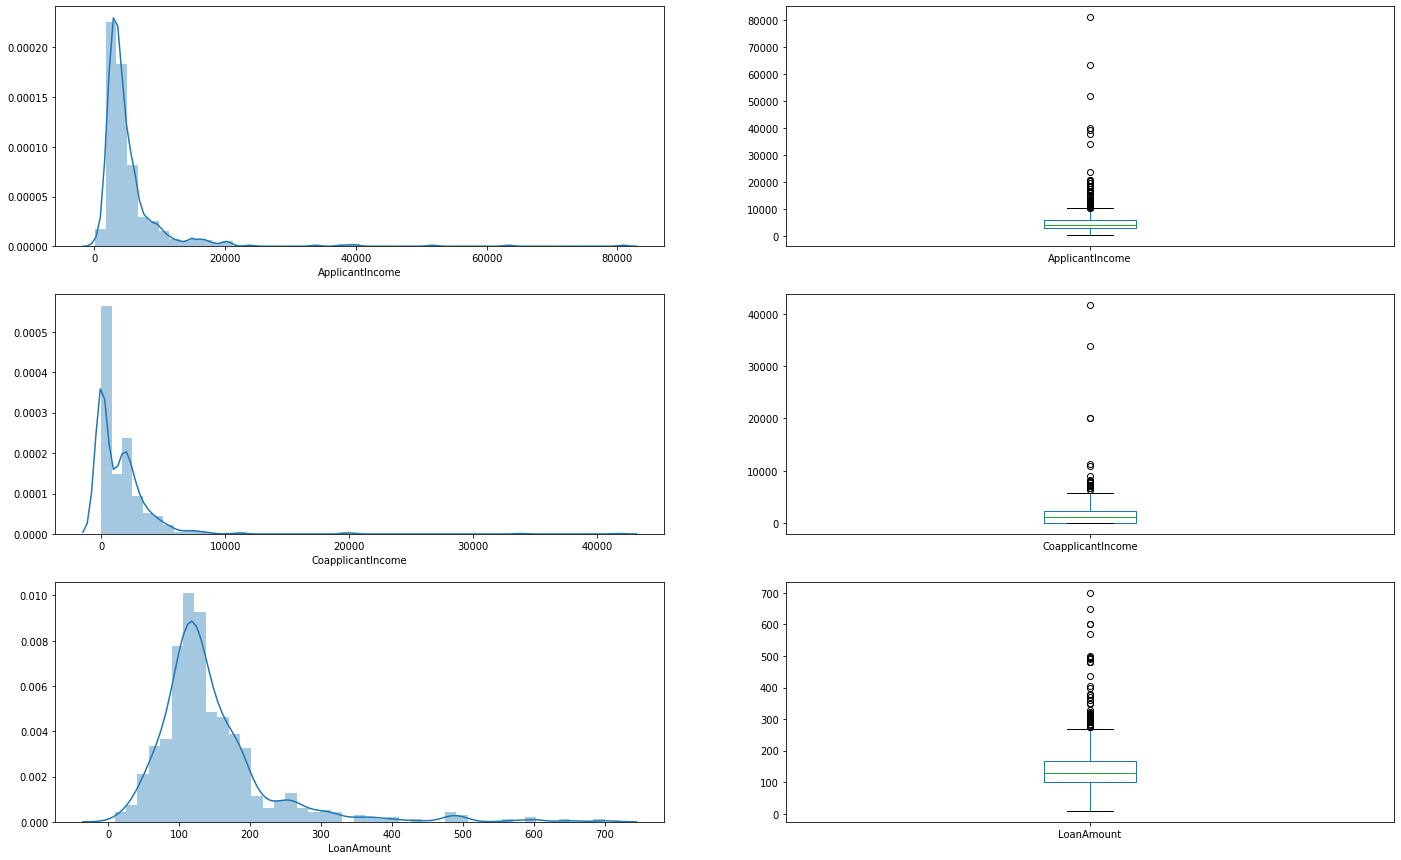

In [5]:
#numerical Variables - ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term
plt.figure(1)
plt.subplot(321)
sns.distplot(train['ApplicantIncome']);
plt.subplot(322)
train['ApplicantIncome'].plot.box(figsize=(24,15))

plt.subplot(323)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(324)
train['CoapplicantIncome'].plot.box(figsize=(24,15))

plt.subplot(325)
sns.distplot(train['LoanAmount']);
plt.subplot(326)
train['LoanAmount'].plot.box(figsize=(24,15))
plt.show()

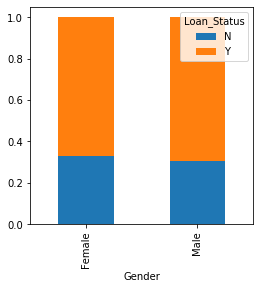

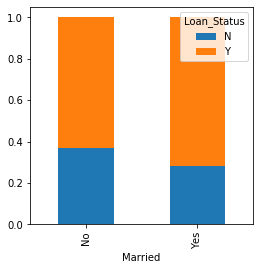

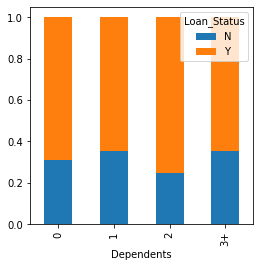

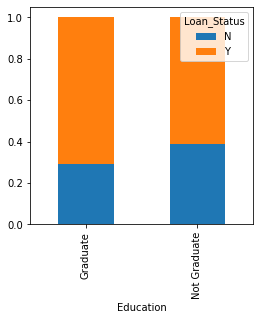

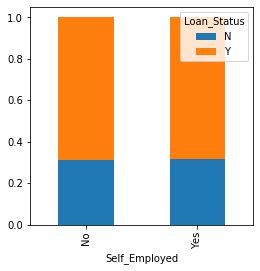

In [6]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True,figsize=(4,4))
plt.show()
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True,figsize=(4,4))
plt.show()

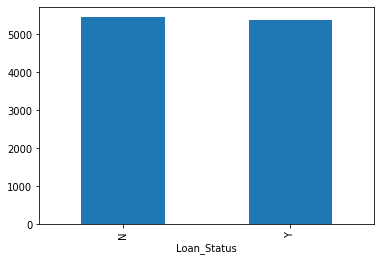

In [7]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

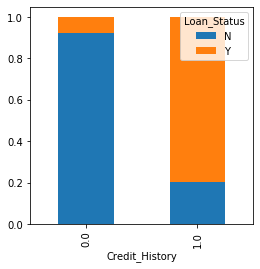

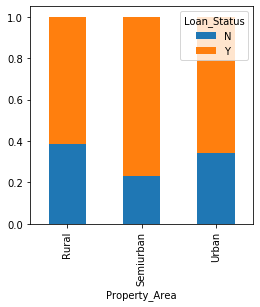

In [8]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True,figsize=(4,4))
plt.show()


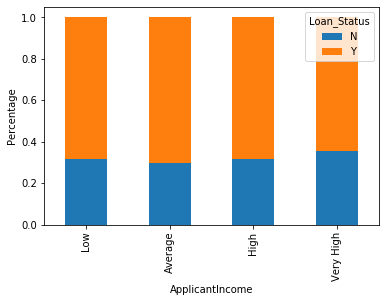

In [9]:
bins = [0,2500,4000,6000,8100]
group  = ['Low','Average','High','Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')
plt.show()

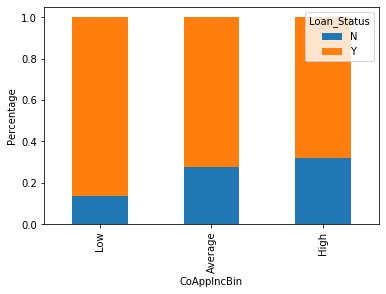

In [10]:
bins = [0,1000,3000,4200]
group = ['Low','Average','High']
train['CoAppIncBin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)
CoAppIncBin = pd.crosstab(train['CoAppIncBin'],train['Loan_Status'])
CoAppIncBin.div(CoAppIncBin.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True)
plt.xlabel('CoAppIncBin')
P = plt.ylabel('Percentage')
plt.show()

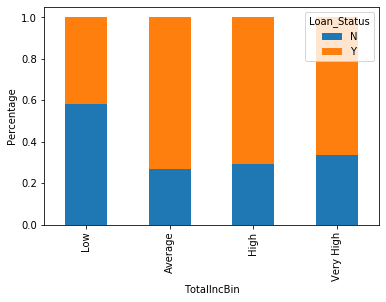

In [11]:
train['TotalInc'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,8100]
group = ['Low','Average','High','Very High']
train['TotalIncBin'] = pd.cut(train['TotalInc'],bins,labels=group)
TotalIncBin = pd.crosstab(train['TotalIncBin'],train['Loan_Status'])
TotalIncBin.div(TotalIncBin.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True)
plt.xlabel('TotalIncBin')
P = plt.ylabel('Percentage')
plt.show()

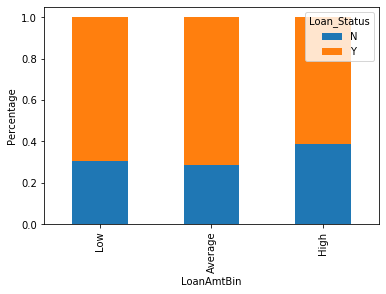

In [12]:
bins = [0,100,200,700]
group=['Low','Average','High']
train['LoanAmtBin'] = pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmtBin = pd.crosstab(train['LoanAmtBin'],train['Loan_Status'])
LoanAmtBin.div(LoanAmtBin.sum(1).astype(float),axis=0).plot(kind="bar",stacked = True)
plt.xlabel('LoanAmtBin')
P = plt.ylabel('Percentage')
plt.show()

In [13]:
train = train.drop(['Income_bin','CoAppIncBin','TotalIncBin','LoanAmtBin'],axis = 1)

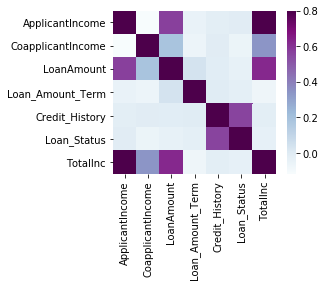

In [14]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

matrix = train.corr()
f, ax = plt.subplots(figsize=(4,3))
sns.heatmap(matrix,vmax=0.8,square = True,cmap="BuPu");
plt.show()

In [15]:
print("Train Dataset:")
print(train.isnull().sum())
print("Test Dataset:")
print(test.isnull().sum())

Train Dataset:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalInc              0
dtype: int64
Test Dataset:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [16]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [17]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [18]:
train['LoanAmtLog'] = np.log(train['LoanAmount'])
test['LoanAmtLog'] = np.log(test['LoanAmount'])

In [19]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

x = train.drop('Loan_Status',1)
y = train.Loan_Status

x = pd.get_dummies(x)
train = pd.get_dummies(train);
test=pd.get_dummies(test)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3)
scaler = preprocessing.StandardScaler().fit(x_train)
scaler.transform(x_train)

array([[-0.62218454, -0.1207756 , -0.23921948, ...,  1.53348052,
        -0.79446756, -0.67763093],
       [-0.34242873,  0.78902968,  0.08271374, ...,  1.53348052,
        -0.79446756, -0.67763093],
       [ 0.33004842, -0.52014798, -0.09613805, ..., -0.65211132,
        -0.79446756,  1.47572957],
       ...,
       [-0.17896096, -0.52014798, -0.17960222, ..., -0.65211132,
         1.25870463, -0.67763093],
       [-0.56149326,  0.1694456 , -0.48961199, ...,  1.53348052,
        -0.79446756, -0.67763093],
       [ 0.26913564,  0.9382772 ,  1.35852319, ..., -0.65211132,
         1.25870463, -0.67763093]])

In [20]:
#decision tree
from sklearn import tree
decTree = tree.DecisionTreeClassifier()
decTree.fit(x_train,y_train)
y_pred_decision_Tree = decTree.predict(x_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
kNbr = KNeighborsClassifier(n_neighbors = 3)
kNbr.fit(x_train,y_train)
y_pred_kNbr = kNbr.predict(x_test)

In [22]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)

In [23]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(x_train, y_train)
y_pred_logistic_regression = logReg.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
acc_decision_tree = accuracy_score(y_test,y_pred_decision_Tree)
acc_kNbr = accuracy_score(y_test, y_pred_kNbr)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
acc_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print("accuracy of decision tree model:",acc_decision_tree)
print("accuracy of KNeighbors:",acc_kNbr)
print("accuracy of Gaussian Naive Bayes:",acc_gnb)
print("accuracy of Logistic Regression:",acc_logistic_regression)

accuracy of decision tree model: 0.6864864864864865
accuracy of KNeighbors: 0.5837837837837838
accuracy of Gaussian Naive Bayes: 0.8108108108108109
accuracy of Logistic Regression: 0.7945945945945946


In [25]:
test['TotalInc'] = test['ApplicantIncome'] + test['CoapplicantIncome']

In [27]:
y_pred_decision_Tree_test = decTree.predict(test)
y_pred_kNbr_test = kNbr.predict(test)
y_pred_gnb_test = gnb.predict(test)
y_pred_logistic_regression_test = logReg.predict(test)

In [33]:
print("test data prediction using decision tree:")
count = 1
for i in y_pred_decision_Tree_test:
    if i==1:
        print(count,"yes")
    else:
        print(count,"no")
    count+=1

test data prediction using decision tree:
1 yes
2 yes
3 yes
4 yes
5 yes
6 yes
7 no
8 no
9 yes
10 no
11 yes
12 no
13 yes
14 no
15 no
16 yes
17 yes
18 no
19 yes
20 no
21 yes
22 yes
23 yes
24 yes
25 yes
26 no
27 yes
28 yes
29 no
30 yes
31 no
32 yes
33 no
34 yes
35 yes
36 no
37 yes
38 yes
39 yes
40 yes
41 yes
42 yes
43 no
44 no
45 yes
46 yes
47 yes
48 no
49 yes
50 no
51 yes
52 no
53 no
54 yes
55 yes
56 no
57 no
58 no
59 no
60 no
61 no
62 yes
63 no
64 no
65 yes
66 no
67 no
68 no
69 no
70 no
71 no
72 no
73 yes
74 no
75 no
76 yes
77 yes
78 no
79 no
80 yes
81 no
82 yes
83 no
84 no
85 no
86 no
87 yes
88 no
89 no
90 no
91 no
92 no
93 no
94 no
95 no
96 no
97 yes
98 no
99 yes
100 no
101 no
102 no
103 yes
104 no
105 no
106 no
107 no
108 no
109 no
110 yes
111 no
112 no
113 yes
114 no
115 no
116 no
117 no
118 no
119 no
120 no
121 yes
122 no
123 yes
124 no
125 no
126 no
127 no
128 yes
129 yes
130 no
131 yes
132 no
133 no
134 yes
135 yes
136 yes
137 no
138 no
139 no
140 no
141 no
142 no
143 no
144 no
1

In [39]:
print("test data prediction using k-neighbors:")
count = 1
for i in y_pred_kNbr_test:
    if i==1:
        print(count,"yes")
    else:
        print(count,"no")
    count+=1

test data prediction using k-neighbors:
1 yes
2 no
3 yes
4 no
5 no
6 yes
7 no
8 no
9 yes
10 no
11 no
12 no
13 no
14 no
15 no
16 yes
17 no
18 no
19 yes
20 yes
21 no
22 no
23 no
24 no
25 yes
26 yes
27 no
28 yes
29 no
30 no
31 no
32 yes
33 no
34 no
35 no
36 no
37 yes
38 no
39 yes
40 no
41 yes
42 no
43 no
44 yes
45 no
46 yes
47 no
48 no
49 yes
50 yes
51 no
52 no
53 yes
54 no
55 no
56 no
57 no
58 yes
59 yes
60 no
61 no
62 no
63 yes
64 no
65 no
66 yes
67 no
68 no
69 yes
70 no
71 no
72 no
73 no
74 no
75 yes
76 yes
77 no
78 yes
79 yes
80 yes
81 no
82 yes
83 no
84 yes
85 no
86 no
87 no
88 no
89 no
90 yes
91 no
92 yes
93 no
94 no
95 no
96 yes
97 yes
98 yes
99 yes
100 no
101 no
102 no
103 no
104 no
105 no
106 no
107 no
108 no
109 no
110 no
111 no
112 no
113 no
114 yes
115 no
116 yes
117 no
118 no
119 no
120 no
121 no
122 yes
123 no
124 no
125 no
126 no
127 yes
128 yes
129 no
130 no
131 no
132 no
133 no
134 no
135 no
136 no
137 no
138 no
139 no
140 no
141 no
142 yes
143 yes
144 yes
145 yes
146 no


In [37]:
print("test data prediction using Gaussian Naive Bayes:")
count = 1
for i in y_pred_gnb_test:
    if i==1:
        print(count,"yes")
    else:
        print(count,"no")
    count+=1

test data prediction using Gaussian Naive Bayes:
1 no
2 no
3 no
4 no
5 no
6 no
7 no
8 no
9 no
10 no
11 no
12 no
13 no
14 no
15 no
16 no
17 no
18 no
19 no
20 no
21 no
22 no
23 no
24 no
25 no
26 no
27 no
28 no
29 no
30 no
31 no
32 no
33 no
34 no
35 no
36 no
37 no
38 no
39 no
40 no
41 no
42 no
43 no
44 no
45 no
46 no
47 no
48 no
49 no
50 no
51 no
52 no
53 no
54 no
55 no
56 no
57 no
58 no
59 no
60 no
61 no
62 no
63 no
64 no
65 no
66 no
67 no
68 no
69 no
70 no
71 no
72 no
73 no
74 no
75 no
76 no
77 no
78 no
79 no
80 no
81 no
82 no
83 no
84 no
85 no
86 no
87 no
88 no
89 no
90 no
91 no
92 no
93 no
94 no
95 no
96 no
97 no
98 no
99 no
100 no
101 no
102 no
103 no
104 no
105 no
106 no
107 no
108 no
109 no
110 no
111 no
112 no
113 no
114 no
115 no
116 no
117 no
118 no
119 no
120 no
121 no
122 no
123 no
124 no
125 no
126 no
127 no
128 no
129 no
130 no
131 no
132 no
133 no
134 no
135 no
136 no
137 no
138 no
139 no
140 no
141 no
142 no
143 no
144 no
145 no
146 no
147 no
148 no
149 no
150 no
151 no
15

In [38]:
print("test data prediction using Logistic Regression:")
count = 1
for i in y_pred_logistic_regression_test:
    if i==1:
        print(count,"yes")
    else:
        print(count,"no")
    count+=1

test data prediction using Logistic Regression:
1 no
2 no
3 no
4 no
5 no
6 no
7 no
8 no
9 no
10 no
11 no
12 no
13 no
14 no
15 no
16 no
17 no
18 no
19 no
20 no
21 no
22 no
23 no
24 no
25 no
26 no
27 no
28 no
29 no
30 no
31 no
32 no
33 no
34 no
35 no
36 no
37 no
38 no
39 no
40 no
41 no
42 no
43 no
44 no
45 no
46 no
47 no
48 no
49 no
50 no
51 no
52 no
53 no
54 no
55 no
56 no
57 no
58 no
59 no
60 no
61 no
62 no
63 no
64 no
65 no
66 no
67 no
68 no
69 no
70 no
71 no
72 no
73 no
74 no
75 no
76 no
77 no
78 no
79 no
80 no
81 no
82 no
83 no
84 no
85 no
86 no
87 no
88 no
89 no
90 no
91 no
92 no
93 no
94 no
95 no
96 no
97 no
98 no
99 no
100 no
101 no
102 no
103 no
104 no
105 no
106 no
107 no
108 no
109 no
110 no
111 no
112 no
113 no
114 no
115 no
116 no
117 no
118 no
119 no
120 no
121 no
122 no
123 no
124 no
125 no
126 no
127 no
128 no
129 no
130 no
131 no
132 no
133 no
134 no
135 no
136 no
137 no
138 no
139 no
140 no
141 no
142 no
143 no
144 no
145 no
146 no
147 no
148 no
149 no
150 no
151 no
152